In [65]:
#引入源代码
import requests
r = requests.get("https://python123.io/ws/demo.html")
r.text

'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [66]:
demo = r.text

In [3]:
from bs4 import BeautifulSoup  #访问b库
soup = BeautifulSoup(demo,'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


### Beautiful Soup库的基础
可以解析HTML，xls文件的库，beautiful soup库是解析、遍历。维护“标签树”的功能库
#### 标签的具体格式 
```<p class="title">...</p>  ```  
p是标签的名称，p后边是属性域，用来定义这个标签的特点，由键值对构成
#### Beautiful Soup库的引用
也叫bs4库  
from bs4 import BeautifulSoup

通过BeautifulSoup库，使标签树形成了对应变量，对该变量的处理就是对标签树的处理

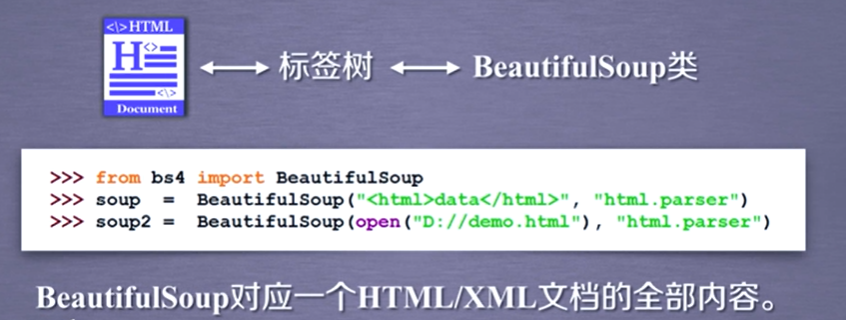

#### Beautiful Soup类的基本元素
| 基本元素 | 说明 | 
| :--- | --- |
| Tag | 标签，最基本的信息组织单元，分别用<>和</>标明开头和结尾 | 
| Name | 标签的名字，`<p>...</p>的名字是'p'，格式:<tag>.name`|
| Attributes | 标签的属性，字典形式组织，格式：`<tag>.attrs` |
| NavigableString | 标签内非属性字符串,`<>..</>`中字符串，格式`<tag>.string` |
| Comment | 标签内字符串的注释部分，一种特殊的Comment类型 |

#### Beautiful Soup库解析器
| 解析器 | 使用方法 | 条件 |
| :--- | --- | --- |
| bs4的HTML解析器 | BeautifulSoup(mk,'html.parser') | 安装bs4库 |
| lxml的HTML解析器 | BeautifulSoup(mk,'lxml') | pip install lxml |
| lxml的XML解析器 | BeautifulSoup(mk,'xml') | pip install lxml |
| html5lib的解析器 | BeautifulSoup(mk,'html5lib') | pip install html5lib |

In [10]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(demo,'html.parser')
soup.a.name  #对任何一个标签使用.name方式获得一个名字

'a'

In [11]:
soup.a.parent.name

'p'

In [13]:
soup.a.parent.parent.name

'body'

In [14]:
tag = soup.a
tag.attrs   #标签属性

{'href': 'http://www.icourse163.org/course/BIT-268001',
 'class': ['py1'],
 'id': 'link1'}

In [15]:
tag.attrs['class']

['py1']

In [16]:
type(tag.attrs)

dict

In [17]:
type(tag)

bs4.element.Tag

In [19]:
soup.a

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>

In [22]:
soup.a.string

'Basic Python'

In [23]:
soup.p

<p class="title"><b>The demo python introduces several python courses.</b></p>

In [33]:
newsoup = BeautifulSoup("<p class='title'><b>The demo python introduces several python courses.</b></p>","html.parser")
newsoup.b.string

'The demo python introduces several python courses.'

In [34]:
newsoup.p.string

'The demo python introduces several python courses.'

### 基于bs4库的HTML内容遍历方法

In [67]:
from bs4 import BeautifulSoup  #访问b库
soup = BeautifulSoup(demo,'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


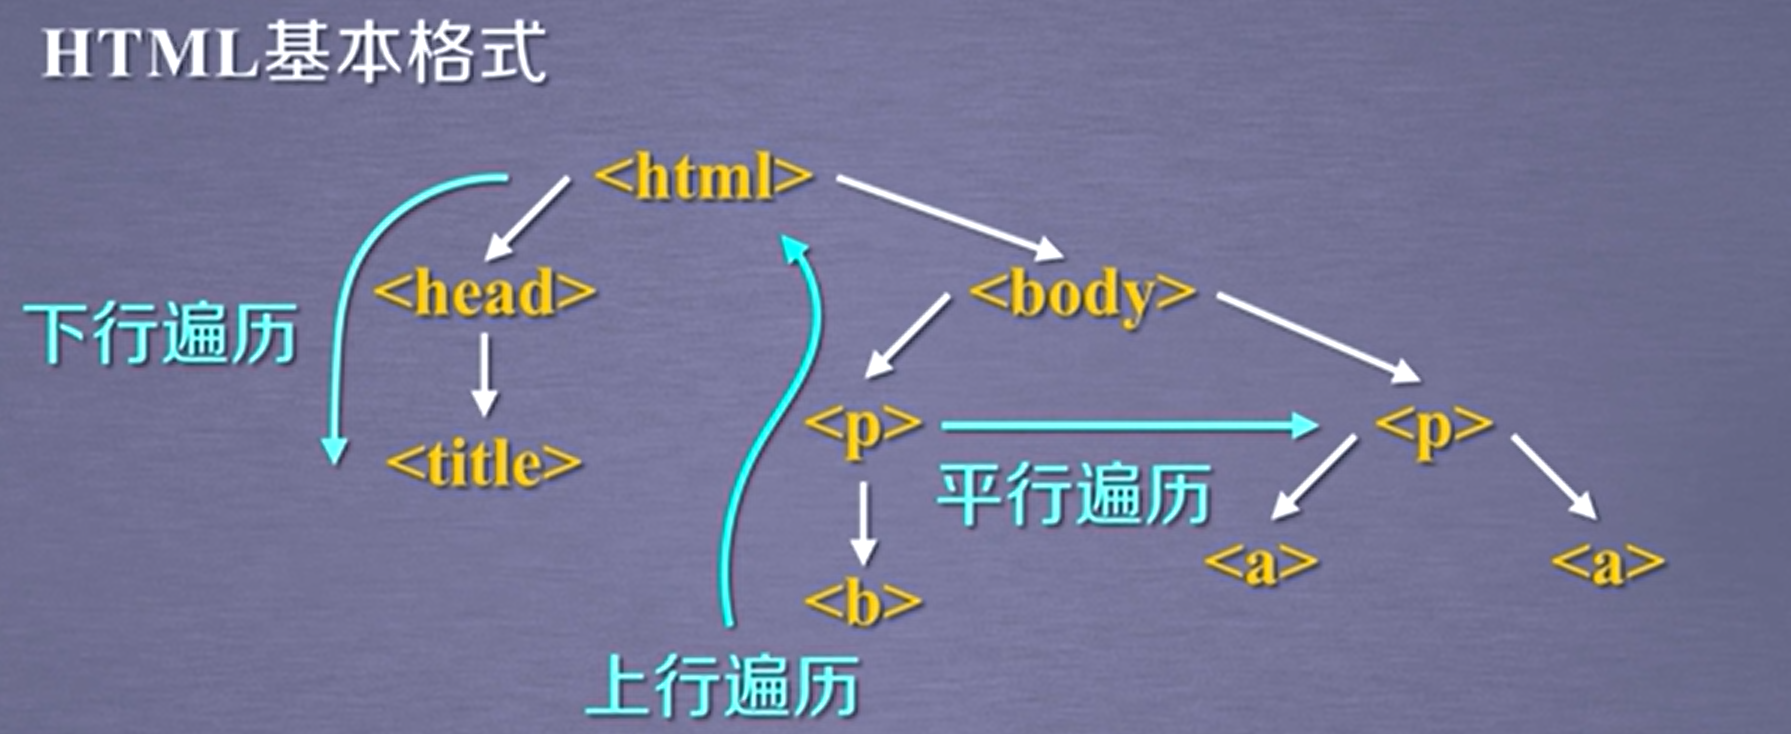

#### 标签树的下行遍历
| 基本元素 | 说明 | 
| :--- | --- |
| .contents | 子节点的列表，将`<tag>`所有儿子节点存入列表 | 
| .children | 子节点的迭代类型，与.content类似，用于循环遍历儿子节点 |
| .descendants | 子孙节点的迭代类型，包含所有子孙节点，用于循环遍历 |

In [69]:
soup = BeautifulSoup(demo,"html.parser")
soup.head

<head><title>This is a python demo page</title></head>

In [71]:
soup.head.contents

[<title>This is a python demo page</title>]

In [72]:
soup.body.contents

['\n',
 <p class="title"><b>The demo python introduces several python courses.</b></p>,
 '\n',
 <p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>,
 '\n']

In [73]:
len(soup.body.contents)

5

In [74]:
soup.body.contents[1]

<p class="title"><b>The demo python introduces several python courses.</b></p>

#### 标签树的上行遍历
| 属性 | 说明 |
| :-- | :---: |
| .parent | 节点的父亲标签 |
| .parents | 节点先标签的迭代类型，用于循环遍历先辈节点 |

In [75]:
soup = BeautifulSoup(demo,"html.parser")
soup.title.parent

<head><title>This is a python demo page</title></head>

In [77]:
soup.html.parent

<html><head><title>This is a python demo page</title></head>
<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body></html>

In [80]:
soup = BeautifulSoup(demo,"html.parser")
for parent in soup.a.parents:
    if parent is None:
        print(parent)
    else:
        print(parent.name)

p
body
html
[document]


#### 标签树的平行遍历
| 属性 | 说明 |
| :-- | :---: |
| .next_sibling | 返回按照HTML文本顺序的下一个平行节点标签 |
| .previous_sibling | 返回按照HTML文本顺序的上一个平行节点标签 |
| .next_siblings | 迭代类型，返回按照HTML文本顺序的后续所有平行节点标签 |
| .previous_siblings | 迭代类型，返回按照HTML文本顺序的前续所有平行节点标签 |

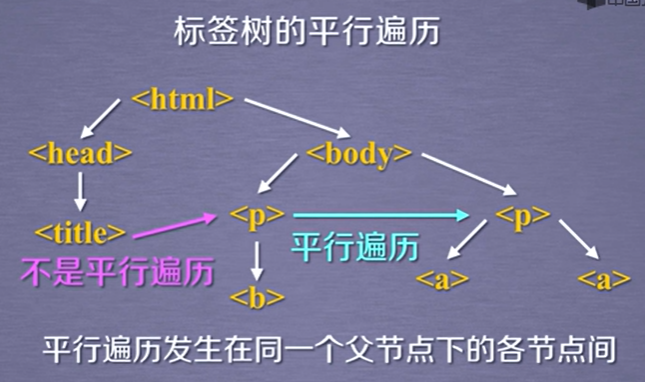

In [82]:
soup = BeautifulSoup(demo,"html.parser")
soup.a.next_sibling

' and '

In [84]:
soup.a.next_sibling.next_sibling

<a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>

In [85]:
soup.a.previous_sibling

'Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n'

### 基于bs4库的HTML格式输出
如何让HTML页面更加友好的显示  
bs4  prettify() 方法

In [86]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(demo,'html.parser')
soup.prettify()

'<html>\n <head>\n  <title>\n   This is a python demo page\n  </title>\n </head>\n <body>\n  <p class="title">\n   <b>\n    The demo python introduces several python courses.\n   </b>\n  </p>\n  <p class="course">\n   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\n   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">\n    Basic Python\n   </a>\n   and\n   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">\n    Advanced Python\n   </a>\n   .\n  </p>\n </body>\n</html>'

In [87]:
print(soup.prettify())

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>
